In [110]:
#Importing required libraries
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

import os
import pandas as pd

from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from keras.callbacks import History

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [111]:
#Test Train Split
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)
#plt.imshow(X_train[1170])
#plt.show()

input_dim=x_train.shape[1]
print(input_dim)

(60000, 28, 28)
(10000, 28, 28)
28


In [112]:
# Build Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers

# Function to create model, required for KerasClassifier
def create_model(activation='relu',
                 optimizer='adam'):
    
    # Create model
    model = Sequential()
    # Input
    model.add(Flatten())
    # Hidden
    model.add(Dense(128, activation=activation))
    # Output
    model.add(Dense(10,activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

In [113]:
# Create model using Keras Claasifier
kmodel = KerasClassifier(build_fn=create_model)
kmodel.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.9412 - accuracy: 0.8177
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3929 - accuracy: 0.9076
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2894 - accuracy: 0.9275
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2387 - accuracy: 0.9400
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2278 - accuracy: 0.9397


In [114]:
# Specify Hyperparameters and Model Design Components
activation =  ['relu', 'elu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
epochs = [10,20,30,40,50]
batch_size = [1024,2048]
param_dist = dict (activation=activation,
                   optimizer=optimizer,
                   epochs=epochs,
                   batch_size=batch_size)

In [115]:
# Perform Randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(estimator=kmodel, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   n_jobs=1, cv=3,
                                   scoring='accuracy')
random_search.fit(x_test, y_test)

Epoch 1/20
4/4 [==============================] - 0s 5ms/step - loss: 2.6746 - accuracy: 0.1661
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 1.8168 - accuracy: 0.3613
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4290 - accuracy: 0.5384
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1865 - accuracy: 0.6410
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 1.0048 - accuracy: 0.6974
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.9001 - accuracy: 0.7350
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8140 - accuracy: 0.7658
Epoch 8/20
4/4 [==============================] - 0s 6ms/step - loss: 0.7499 - accuracy: 0.7901
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7008 - accuracy: 0.8067
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.8197
Epoch 11/20
4/4 [======================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 0s 5ms/step - loss: 2.6807 - accuracy: 0.1406
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 1.8479 - accuracy: 0.3774
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 1.4802 - accuracy: 0.5185
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 1.2730 - accuracy: 0.5977
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1187 - accuracy: 0.6615
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 1.0073 - accuracy: 0.6945
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.9305 - accuracy: 0.7229
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8606 - accuracy: 0.7479
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8076 - accuracy: 0.7644
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7614 - accuracy: 0.7832
Epoch 11/20
4/4 [==============================] -

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fcef9cadd90>,
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'activation': ['relu', 'elu', 'tanh',
                                                       'sigmoid',
                                                       'hard_sigmoid',
                                                       'linear'],
                                        'batch_size': [1024, 2048],
                                        'epochs': [10, 20, 30, 40, 50],
                                        'optimizer': ['SGD', 'RMSprop',
                                                      'Adagrad', 'Adadelta',
                                                      'Adam', 'Adamax',
                                                      'Nadam']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,

In [116]:
# Show results
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.901202 using {'optimizer': 'Nadam', 'epochs': 40, 'batch_size': 1024, 'activation': 'hard_sigmoid'}
0.800303 (0.023814) with: {'optimizer': 'Adamax', 'epochs': 20, 'batch_size': 2048, 'activation': 'tanh'}
0.878101 (0.014063) with: {'optimizer': 'RMSprop', 'epochs': 20, 'batch_size': 2048, 'activation': 'relu'}
0.119099 (0.007864) with: {'optimizer': 'Adadelta', 'epochs': 50, 'batch_size': 2048, 'activation': 'elu'}
0.901202 (0.017543) with: {'optimizer': 'Nadam', 'epochs': 40, 'batch_size': 1024, 'activation': 'hard_sigmoid'}
0.874603 (0.027327) with: {'optimizer': 'RMSprop', 'epochs': 20, 'batch_size': 2048, 'activation': 'elu'}
0.841904 (0.026462) with: {'optimizer': 'Adamax', 'epochs': 30, 'batch_size': 1024, 'activation': 'linear'}
0.878203 (0.021574) with: {'optimizer': 'Adam', 'epochs': 30, 'batch_size': 2048, 'activation': 'tanh'}
0.802506 (0.042875) with: {'optimizer': 'Adamax', 'epochs': 10, 'batch_size': 2048, 'activation': 'relu'}
0.785004 (0.028655) with: {'optimiz

In [117]:
# Choose best Optimized value for the parameters previously defined
a=random_search.best_params_
epo=a.get('epochs')
act=a.get('activation')
bat_sz=a.get('batch_size')
opt=a.get('optimizer')

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8516 - accuracy: 0.7637
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4040 - accuracy: 0.8850
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3662 - accuracy: 0.8915
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3317 - accuracy: 0.9016
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.9052
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3081 - accuracy: 0.9078
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.9097
Epoch 8/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2772 - accuracy: 0.9168
Epoch 9/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.9097
Epoch 10/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.274

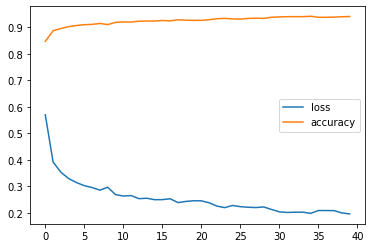

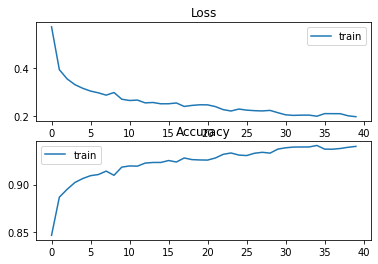

In [119]:
# Create a simple Model with the best Optimized values
model=Sequential()
model.add(Flatten())
model.add(Dense(128,activation=act))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epo)

pd.DataFrame(model.history.history).plot()
plt.show()

from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(model.history.history['loss'], label='train')
#pyplot.plot(model.history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(model.history.history['accuracy'], label='train')
#pyplot.plot(model.history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [120]:
# Compute Validation Loss and Accuracy
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2130 - accuracy: 0.9338
0.21297281980514526 0.9337999820709229


In [121]:
# Save the model for future use
model.save("model_name.model")

INFO:tensorflow:Assets written to: model_name.model/assets


In [122]:
# To use this model
new_model_testing=tf.keras.models.load_model("model_name.model")

In [123]:
# Make prediction using  model
prediction=model.predict(x_test)

In [124]:
# Print the list of predictions
import numpy as np
# this list gives all predictions made
list2=[]

for i in prediction:
    list2.append(np.argmax(i))
    
print(list2)

[7, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 7, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 9, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 3, 8, 7, 2, 3, 0, 2, 4, 2, 9, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 9, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [125]:

# Print the required Metrics
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, list2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, list2,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, list2,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, list2,average='weighted')
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(y_test, list2)
print(matrix)

Accuracy: 0.933800
Precision: 0.934274
Recall: 0.933800
F1 score: 0.933843
[[ 959    0    5    3    1    3    5    1    3    0]
 [   0 1103    4    4    0    1    4    1   17    1]
 [  11    2  955   20    6    0    9   10   18    1]
 [   2    4   17  936    0   19    1    6   14   11]
 [   0    0    5    0  922    0   10    1    7   37]
 [   6    2    3   24    4  814   15    3   16    5]
 [  12    3    1    2    6    9  918    2    5    0]
 [   1    6   18   11    3    1    0  936    1   51]
 [   6    4   10   13   14   10   12    5  869   31]
 [   4    5    3   11   40    5    1    9    5  926]]
